# Decomposition/Factorization

Why is it useful to express something as a few parts multiplied together?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

In [2]:
# at what points does y=0?
#y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

<AxesSubplot:xlabel='x', ylabel='y'>

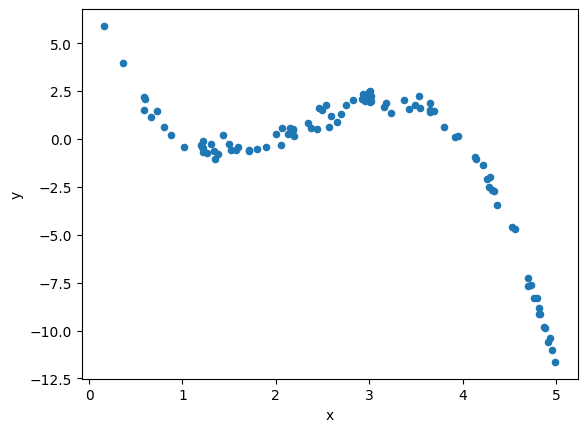

In [3]:
pd.DataFrame({"x": x, "y": -x**3 + 7*x**2 - 14*x + 8 + noise}).plot.scatter(x="x", y="y")

# Matrix Multiplication

In [4]:
A = np.random.normal(size=(9, 7))
B = np.random.normal(size=(7, 14))
C = np.random.normal(size=(14, 4))
D = np.random.normal(size=(4, 15))

In [5]:
print(A.shape, B.shape, C.shape, D.shape)

(9, 7) (7, 14) (14, 4) (4, 15)


In [6]:
# 1. possible when the second+first sizes of consecutive matrices match
# 2. size of the final: rows of the first matrix, and columns of the last
(A @ B @ C @ D).shape

(9, 15)

# Decomposition with PCA 

In [7]:
df = pd.DataFrame(make_blobs(centers=3, random_state=320)[0], columns=["A", "B"])
df["C"] = df["A"] * 2
df["D"] = df["A"] - df["B"]
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [8]:
df.mean()

A     6.079707
B    -1.523008
C    12.159413
D     7.602715
dtype: float64

In [9]:
df.shape

(100, 4)

In [10]:
p = PCA()
W = p.fit_transform(df)
C = p.components_
m = p.mean_
m

array([ 6.0797066 , -1.5230081 , 12.15941319,  7.60271469])

In [11]:
print(W.shape, C.shape)

(100, 4) (4, 4)


In [12]:
(W @ C).shape

(100, 4)

In [13]:
m.shape  # (4,) => (1, 4) => (100, 4)

(4,)

In [14]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [15]:
pd.DataFrame(W @ C + m).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [16]:
# what's cool about W and C?
# the first columns of W are "most important"
# the first rows of C are "most important"
print(W.shape, C.shape)

(100, 4) (4, 4)


In [17]:
print(W[:, :2].shape)
print(C[:2, :].shape)

(100, 2)
(2, 4)


In [18]:
(W[:, :2] @ C[:2, :]).shape

(100, 4)

In [19]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [20]:
pd.DataFrame(W[:, :2] @ C[:2, :] + m).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [21]:
pd.DataFrame(W[:, :1] @ C[:1, :] + m).head()

,0,1,2,3
0,4.415707,-0.880229,8.831414,5.295936
1,1.903025,0.090383,3.806050,1.812642
2,10.036329,-3.051394,20.072658,13.087723
3,5.011442,-1.110353,10.022883,6.121795
4,5.832180,-1.427392,11.664360,7.259572


# Explained Variance

In [22]:
a = np.array([1.1,1.9,3.2])
a

array([1.1, 1.9, 3.2])

In [23]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [24]:
before = a.var()
before

0.748888888888889

In [25]:
print(a - b)
after = (a - b).var()
after

[ 0.1 -0.1  0.2]


0.015555555555555585

In [26]:
improvement = before - after
improvement / before

0.9792284866468843

In [27]:
p.explained_variance_ratio_.round(2)

array([0.77, 0.23, 0.  , 0.  ])

In [28]:
pd.DataFrame(C[:2, :])

,0,1,2,3
0,0.376062,-0.145267,0.752124,0.521329
1,-0.200986,-0.724122,-0.401973,0.523135


Text(0.5, 0, 'Number of Components')

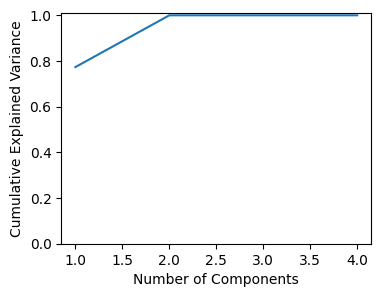

In [29]:
p = PCA()
p.fit(df)
s = pd.Series(p.explained_variance_ratio_.cumsum(), index=range(1,5))
ax = s.plot.line(ylim=0, figsize=(4,3))
ax.set_ylabel("Cumulative Explained Variance")
ax.set_xlabel("Number of Components")

In [30]:
# pass a number to say how many weight columns and component rows we want slice out
p = PCA(2)
W = p.fit_transform(df)
C = p.components_
print(W.shape, C.shape)

(100, 2) (2, 4)


# Feature Dimensionality Reduction

In [31]:
# use the W columns for machine learning and visualization, because this tells
# us a lot about the original 4 columns
pd.DataFrame(W).head()

,0,1
0,-4.424802,-3.808312
1,-11.106364,-3.068153
2,10.521197,-0.399549
3,-2.840662,-4.400534
4,-0.658207,5.154923


In [32]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [ ]:
DATA: 100 x 10
COMPONENTS: 3 x 10
WEIGHTS: 100 x 3

In [33]:
pipe = Pipeline([
    ("pca", PCA(2)),
    ("km", KMeans(3)),
])
groups = pipe.fit_predict(df)
groups

array([0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2], dtype=int32)

<AxesSubplot:xlabel='0', ylabel='1'>

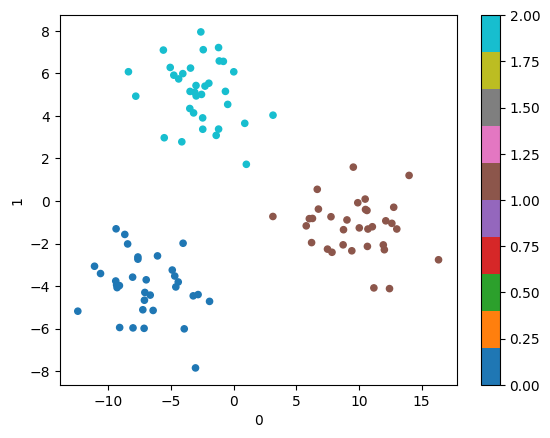

In [34]:
pd.DataFrame(pipe["pca"].transform(df)).plot.scatter(x=0, y=1, c=groups, cmap="tab10")

In [35]:
C

array([[ 0.37606201, -0.14526729,  0.75212402,  0.5213293 ],
       [-0.20098643, -0.72412151, -0.40197287,  0.52313507]])

In [36]:
-4.42480176 * C[0] + -3.80831215 * C[1] + m

array([ 5.18112583,  1.87745161, 10.36225167,  3.30367423])

In [37]:
df.head(1)

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674


In [38]:
W

array([[-4.42480176e+00, -3.80831215e+00],
       [-1.11063644e+01, -3.06815327e+00],
       [ 1.05211969e+01, -3.99548758e-01],
       [-2.84066153e+00, -4.40053418e+00],
       [-6.58207059e-01,  5.15492329e+00],
       [ 1.11900295e+01, -4.08689291e+00],
       [-8.06540928e+00, -3.58187432e+00],
       [-4.39191555e+00,  5.73946584e+00],
       [-8.68917841e+00, -1.57255083e+00],
       [ 1.21399436e+01, -9.32646712e-01],
       [ 6.21807306e+00, -1.95634457e+00],
       [-3.10643828e+00,  5.11184010e+00],
       [ 1.27732134e+01, -2.95176915e-01],
       [-3.00564722e+00,  5.43012965e+00],
       [-8.39937017e+00,  6.07780439e+00],
       [ 1.30181262e+01, -1.31663001e+00],
       [ 6.28819345e+00, -8.20547262e-01],
       [-9.12027221e+00, -3.97861554e+00],
       [ 1.63505793e+01, -2.76396040e+00],
       [-4.06022424e+00,  5.98873445e+00],
       [ 8.76576755e+00, -1.35029204e+00],
       [ 1.39997183e+01,  1.20239208e+00],
       [ 7.76646690e+00, -7.40940257e-01],
       [ 3.

# Lossy Compression

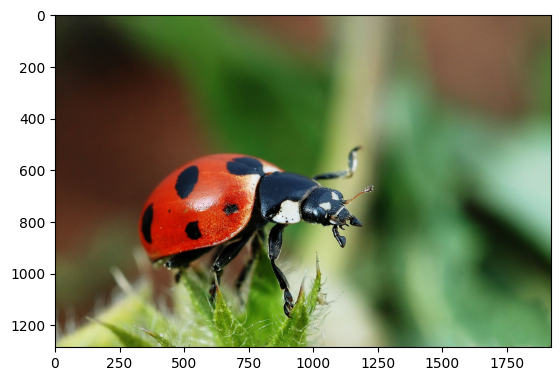

In [39]:
img = plt.imread("bug.jpg")
plt.imshow(img)

In [40]:
img.shape

(1286, 1920, 3)

In [41]:
img = img.mean(axis=2)

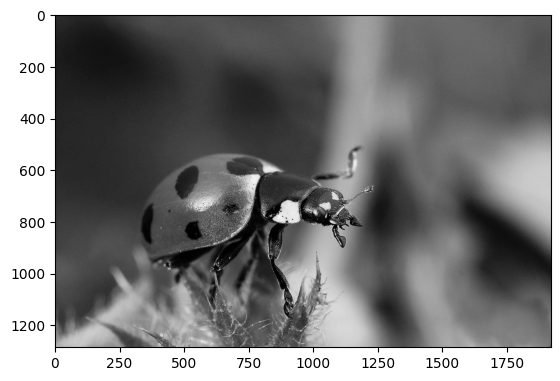

In [42]:
plt.imshow(img, cmap="gray")

In [43]:
img.shape

(1286, 1920)

In [46]:
p = PCA(0.95)
W = p.fit_transform(img)
C = p.components_
m = p.mean_
print(W.shape, C.shape)

(1286, 37) (37, 1920)


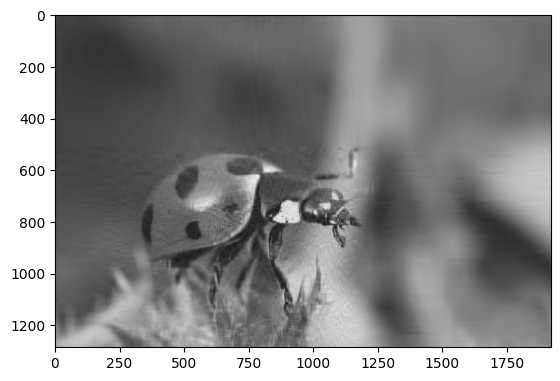

In [47]:
plt.imshow(W @ C + m, cmap="gray")